<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data10/%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bluewin.csv')
df

,Unnamed: 0,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,1,0,0,3,-29.08,0,0,-11.73,0,-66,0
2,2,-4,0,-10,-11.72,1,0,-10.33,0,-17,0
3,3,-1,0,-5,-13.21,0,1,-0.07,0,-34,0
4,4,0,0,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...,...
9221,9874,3,1,-2,25.19,1,0,24.69,0,-18,1
9222,9875,2,0,5,7.82,1,0,8.88,0,27,1
9223,9876,-1,0,-6,-24.16,0,0,-18.77,0,-51,0
9224,9877,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [12]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [13]:
x_data = df.loc[:, 'KillDiff':'MinionDiff'] # 설명변수
y_data = df.loc[:, 'win'] # 종속변수

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, # 문제 데이터
    y_data, # 답 데이터
    test_size =0.2, # 비율
    shuffle = True, # 셔플링 여부
    random_state = 156 # 시드값
)

In [38]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

voting_model_1 = VotingClassifier(estimators=[('LogisticRegression', logistic_regression),('KNN',knn),('DecisionTree',dt)],
                                voting='soft')

voting_model_2 = VotingClassifier(estimators=[('LogisticRegression', logistic_regression),('KNN',knn),('DecisionTree',dt)],
                                voting='hard')

voting_model_1.fit(X_train,y_train)
pred = voting_model_1.predict(X_test)
print('보팅(soft) 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test,pred)))

voting_model_2.fit(X_train,y_train)
pred = voting_model_2.predict(X_test)
print('보팅(hard) 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test,pred)))


classifiers = [logistic_regression, knn, dt]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

보팅(soft) 분류기의 정확도:  0.7297
보팅(hard) 분류기의 정확도:  0.7319
LogisticRegression 정확도: 0.7378
KNeighborsClassifier 정확도: 0.6880
DecisionTreeClassifier 정확도: 0.7199


In [23]:
# 랜덤 포레스트 훈련
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [37]:
# n_jobs=-1 은 cpu 코어를 완전하게 다 쓰게한다.
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9999661246612466
0.6902439024390243


In [40]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist',random_state=9)
scores1 = cross_validate(xgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores1['train_score']), np.mean(scores1['test_score']))

0.7268970189701897 0.7112466124661248


In [41]:
# LightGBM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=124)
scores2 = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores2['train_score']), np.mean(scores2['test_score']))

0.806808943089431 0.6933604336043361


In [53]:
scores1.values()

dict_values([array([0.18213582, 0.19071436, 0.16617417, 0.1803813 , 0.10212803]), array([0.00817752, 0.00918341, 0.01020813, 0.0083878 , 0.00626564]), array([0.71409214, 0.71815718, 0.69918699, 0.70257453, 0.72222222]), array([0.72493225, 0.72611789, 0.72933604, 0.7274729 , 0.72662602])])

In [50]:
scores2.values()

dict_values([array([0.2003355 , 0.21123123, 0.20463967, 0.20281887, 0.11745477]), array([0.01700091, 0.01591611, 0.01484013, 0.01523614, 0.01063609]), array([0.68292683, 0.70121951, 0.69105691, 0.69376694, 0.69783198]), array([0.80555556, 0.80301491, 0.80758808, 0.81097561, 0.80691057])])

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

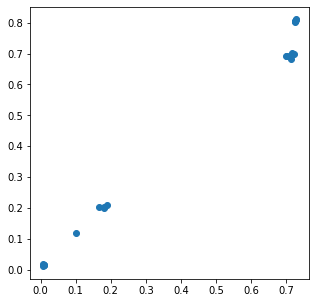

In [52]:
plt.figure(figsize=(5, 5))
plt.scatter(scores1.values(),scores2.values())

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9226 non-null   int64  
 1   KillDiff         9226 non-null   int64  
 2   FirstBlood       9226 non-null   int64  
 3   AssistDiff       9226 non-null   int64  
 4   GoldDiff         9226 non-null   float64
 5   Dragon           9226 non-null   int64  
 6   Herald           9226 non-null   int64  
 7   ExperienceDiff   9226 non-null   float64
 8   TowersDestroyed  9226 non-null   int64  
 9   MinionDiff       9226 non-null   int64  
 10  win              9226 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 793.0 KB


In [62]:
y = df[df['win']==0]
y['win']

0       0
1       0
2       0
3       0
4       0
       ..
9214    0
9216    0
9218    0
9223    0
9224    0
Name: win, Length: 4615, dtype: int64

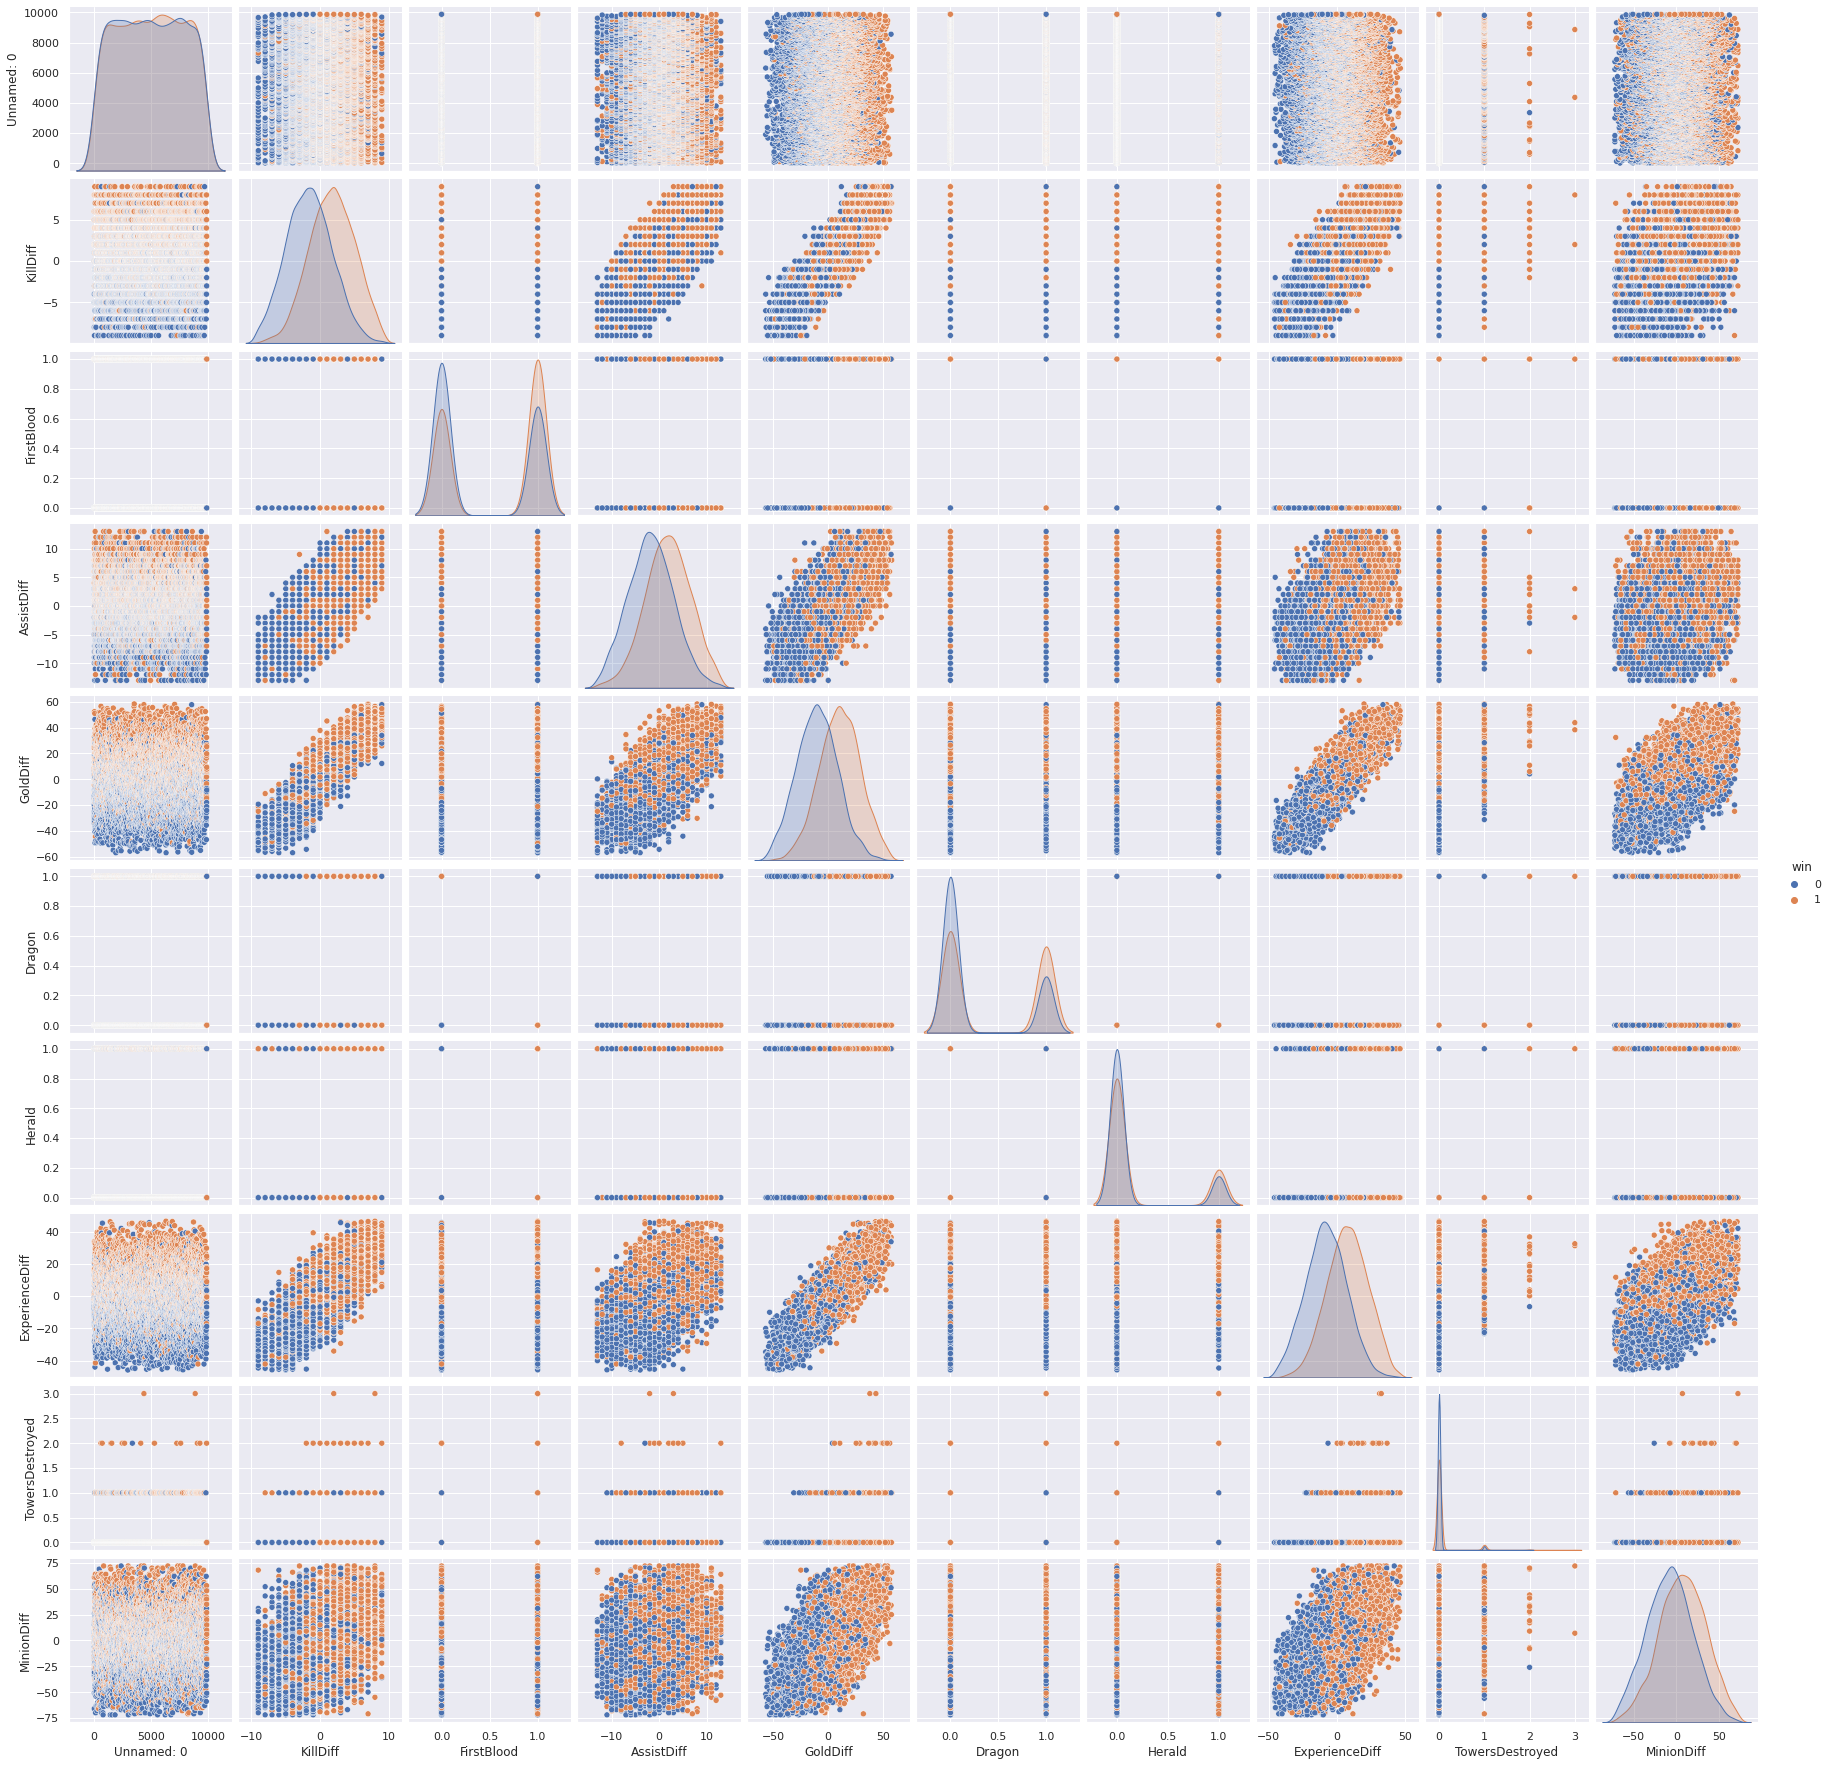

In [74]:
sns.pairplot(df,hue='win')

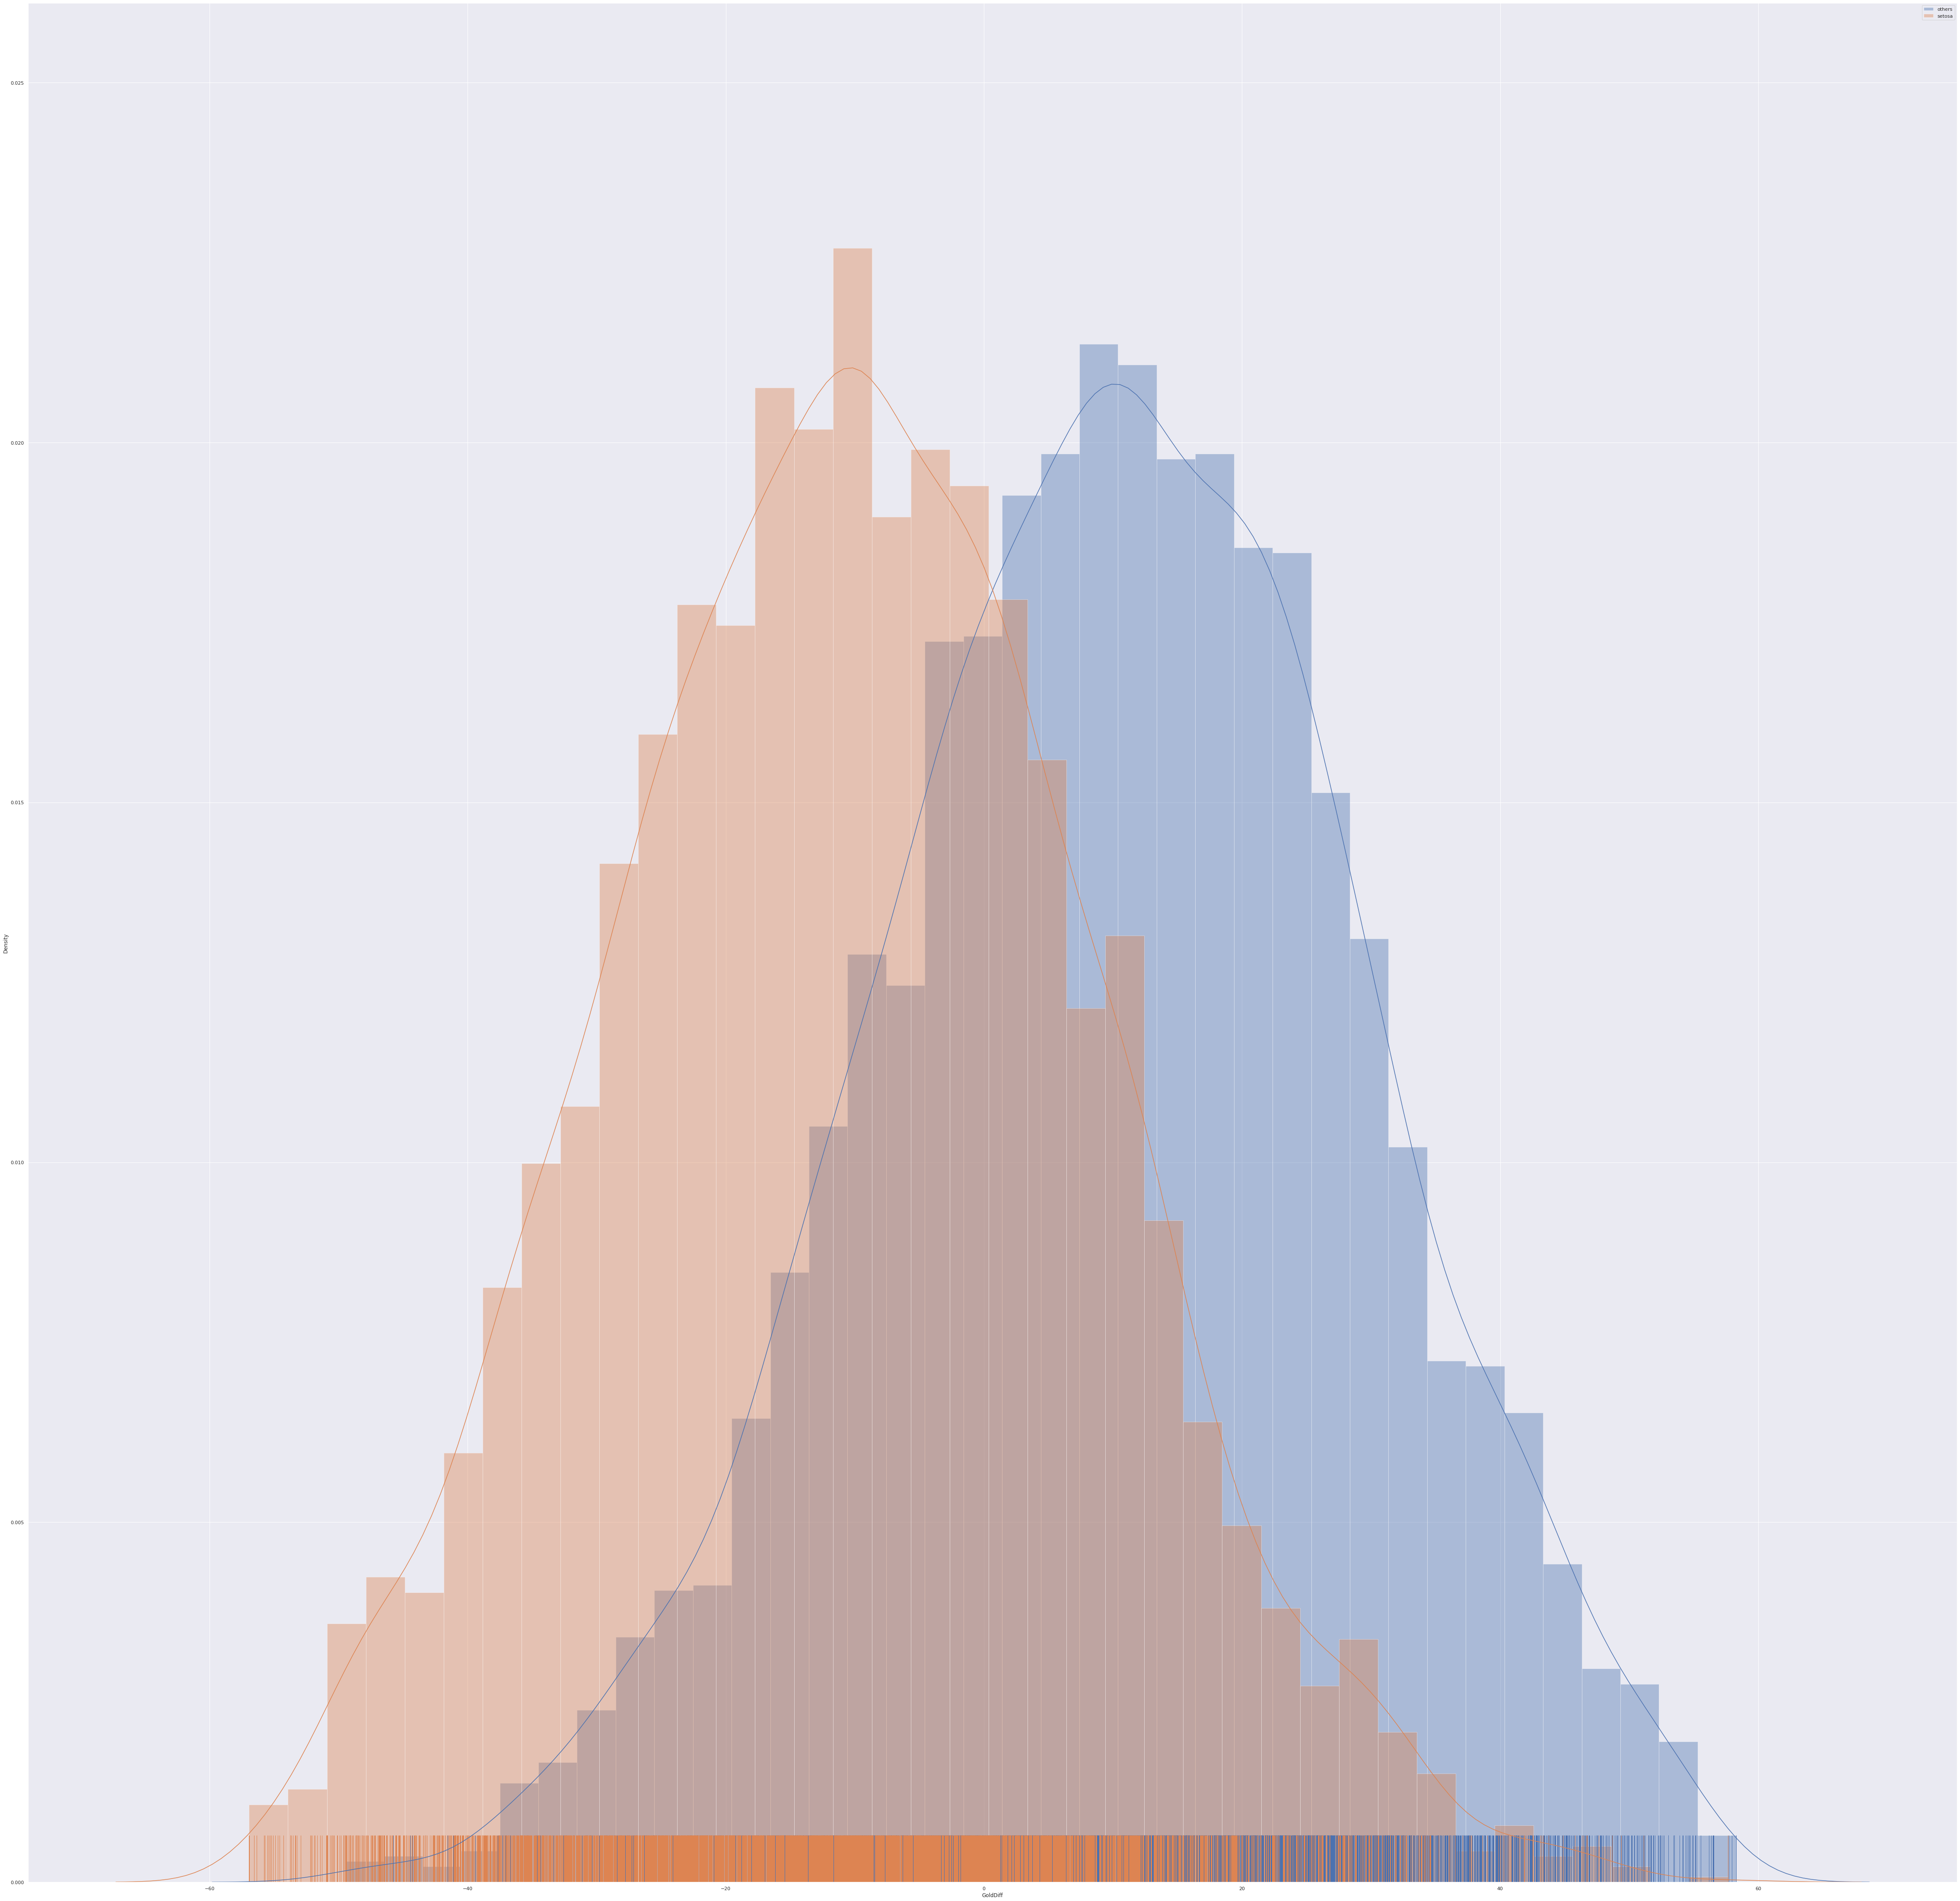

In [75]:
sns.distplot(df[df.win != 0]["GoldDiff"], hist=True, rug=True)
sns.distplot(df[df.win == 0]["GoldDiff"], hist=True, rug=True)
plt.legend()
plt.show()

In [76]:
# 설명변수 설명력
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.11081563 0.0220148  0.11837017 0.29385823 0.02067096 0.01836961
 0.2470315  0.00596859 0.16290052]
